# Assignment 8: Data visualization

Data Visualization I
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information
about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library
to see if we can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each
passenger is distributed by plotting a histogram.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid",font_scale = 1.5)

# Titanic Dataset

### Data description

- survival 	Survival 	0 = No, 1 = Yes
- pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
- sex 	Sex 	
- Age 	Age in years 	
- sibsp 	# of siblings / spouses aboard the Titanic 	
- parch 	# of parents / children aboard the Titanic 	
- ticket 	Ticket number 	
- fare 	Passenger fare 	
- cabin 	Cabin number 	
- embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Load the titanic dataset

In [224]:
data=pd.read_csv('./datasets/train.csv',index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [226]:
data.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

## Data types - 
- Quantitative variables : 6 (Passenger Id is not considered here)
- Qualitative variables : 6

## Checking for null values

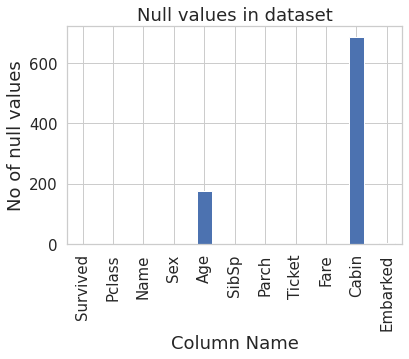

In [227]:
null_v=data.isnull().sum()
null_v.plot(kind='bar',rot='90',fontsize='15',title='Null values in dataset',xlabel='Column Name',ylabel='No of null values')
plt.show()

## Visualizing the qualitative variables in dataset

Survival Rate

Survived          0          1         All
Sex                                       
female     9.090909  26.150393   35.241302
male      52.525253  12.233446   64.758698
All       61.616162  38.383838  100.000000


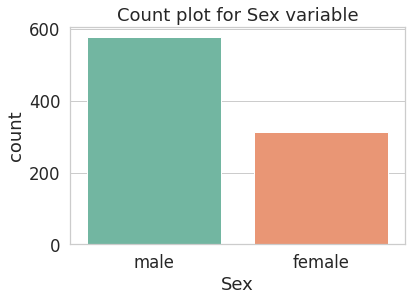

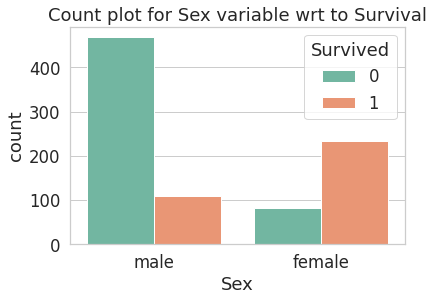

Survival Rate

Survived          0          1         All
Embarked                                  
C          8.436445  10.461192   18.897638
Q          5.286839   3.374578    8.661417
S         48.031496  24.409449   72.440945
All       61.754781  38.245219  100.000000


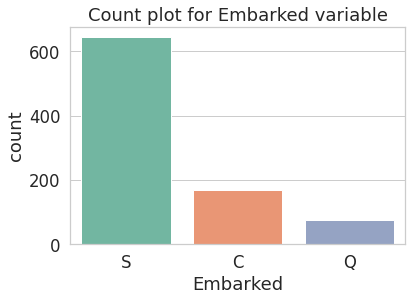

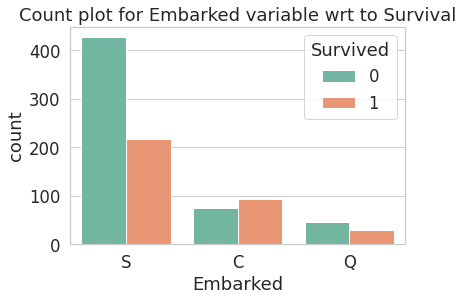

Survival Rate

Survived          0          1         All
Pclass                                    
1          8.978676  15.263749   24.242424
2         10.886644   9.764310   20.650954
3         41.750842  13.355780   55.106622
All       61.616162  38.383838  100.000000


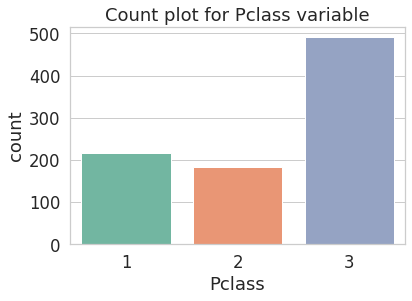

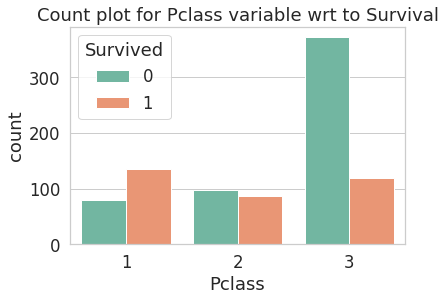

Survival Rate

Survived          0          1         All
SibSp                                     
0         44.668911  23.569024   68.237935
1         10.886644  12.570146   23.456790
2          1.683502   1.459035    3.142536
3          1.346801   0.448934    1.795735
4          1.683502   0.336700    2.020202
5          0.561167   0.000000    0.561167
8          0.785634   0.000000    0.785634
All       61.616162  38.383838  100.000000


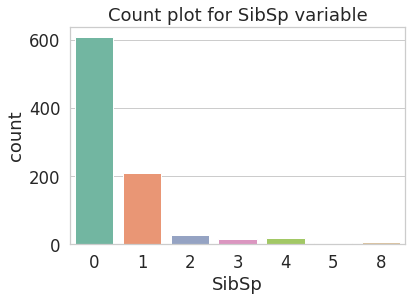

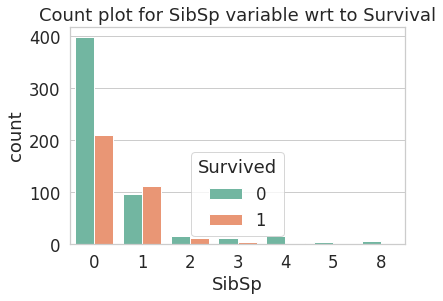

Survival Rate

Survived          0          1         All
Parch                                     
0         49.943883  26.150393   76.094276
1          5.948373   7.295174   13.243547
2          4.489338   4.489338    8.978676
3          0.224467   0.336700    0.561167
4          0.448934   0.000000    0.448934
5          0.448934   0.112233    0.561167
6          0.112233   0.000000    0.112233
All       61.616162  38.383838  100.000000


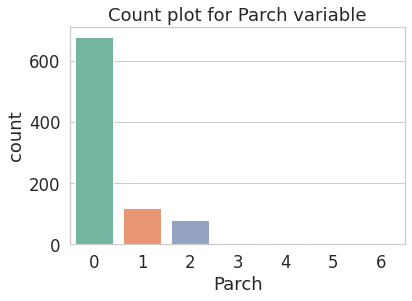

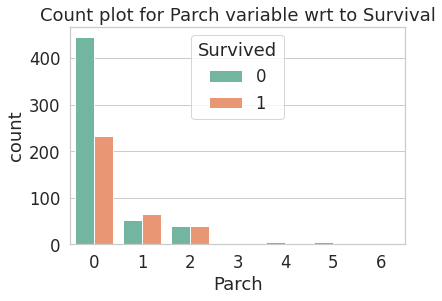

In [228]:
columns=['Sex','Embarked','Pclass','SibSp','Parch']
for col in columns:
    survival_rate=pd.crosstab(data[col],data['Survived'],margins=True,normalize=True)
    print('Survival Rate\n')
    print(survival_rate.applymap(lambda x: x*100))
    sns.countplot(data=data,x=col,palette="Set2")
    plt.title('Count plot for '+col+' variable')
    plt.show()
    sns.countplot(data=data,x=col,hue='Survived',palette="Set2")
    plt.title('Count plot for '+col+' variable wrt to Survival')
    plt.show()

## Histogram

In [229]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

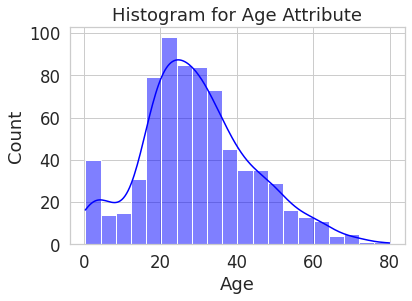

In [230]:
sns.histplot(data=data,x='Age',kde=True,color='blue')
plt.title('Histogram for Age Attribute')
plt.show()

## Distribution of Ages wrt Survival

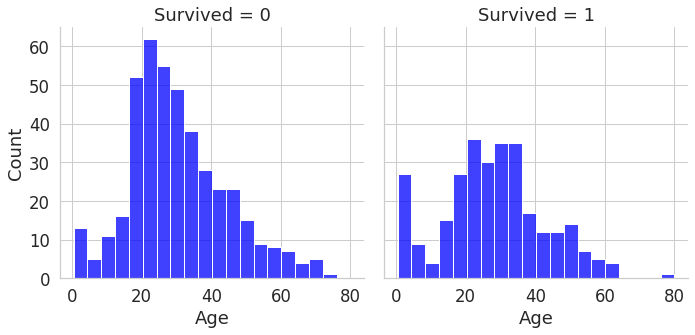

In [231]:
sns.displot(data=data,x='Age',col='Survived',color='blue')
plt.show()

## Distribution of Ages wrt Passenger Class

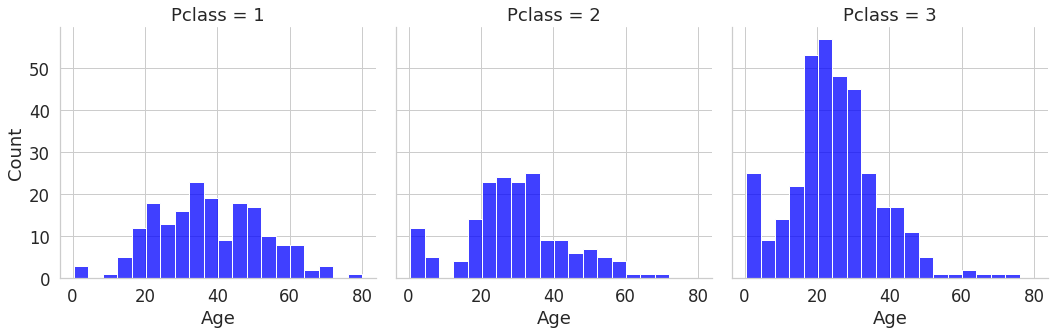

In [232]:
sns.displot(data=data,x='Age',col='Pclass',color='blue')
plt.show()

In [233]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

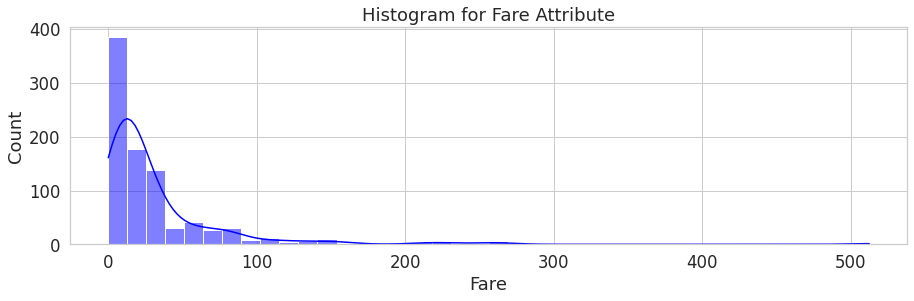

In [234]:
plt.figure(figsize=(15,4))
sns.histplot(data=data,x='Fare',kde=True,bins=40,color='blue')

plt.title('Histogram for Fare Attribute')
plt.show()

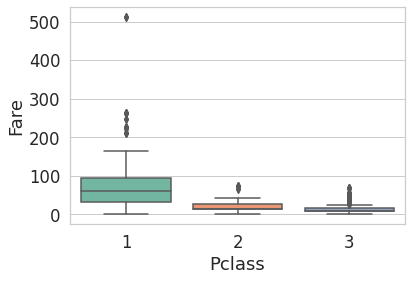

In [235]:
sns.boxplot(data=data,y='Fare',x='Pclass',palette='Set2')
plt.show()

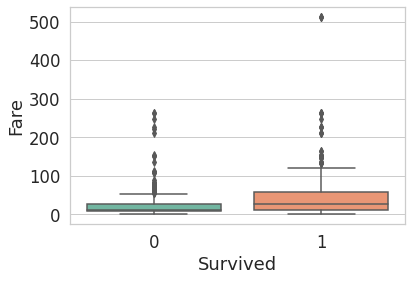

In [236]:
sns.boxplot(data=data,y='Fare',x='Survived',palette='Set2')
plt.show()

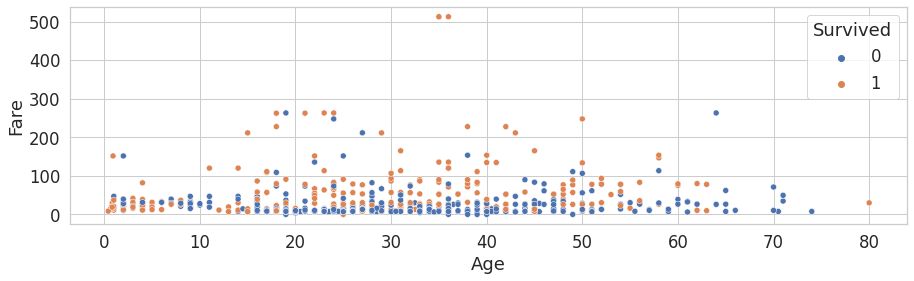

In [237]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=data,x='Age',y='Fare',hue='Survived')
plt.show()